# Analysis and Conversion Predictions With Machine Learning Using Decision Trees

A few weeks ago I had a client who wanted to analyze his consumer database and try to predict consumer conversions, or understand the attributes of the customers most likely to buy into his SaaS company. I asked his permission to publish part of the results, and after aninomizing the personal data of the clients, I gave myself the task of publishing these results. 

Before we start, I would like to give you an overview of the database and its context. It is not a very complex database, but there some important data is stored such as the type of work the client does, marital status, education, something that could apply to any other business, since the important thing is the last column of the database: the `Y` column 

## What is the `Y` column and why is it so important?

The `Y` column can be any column in your database that contains the final result of a customer interaction, in this case the column says `no` for those who did not buy, and says `yes` for those who did. Nothing difficult, right? Everyone should have at least that column in their database. In this particular case, that column tells us if the client finally subscribed to the service or not. 

It is important to note that this data is available for any type of business regardless of size, and they could do this same type of sophisticated analysis and discover with data, which is the ideal type of customer for the company! Very insightful!

For this Notebook you'll find the dataset once <a href="https://www.narrativetext.co/pricing" target="_blank">you subscribe to our service here</a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('datasets/customers.csv', sep=";")

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


As we explained before, here we can see the last column called `y`.

Before we start analyzing the data, we will first code the output variable, `y` with numerical values. We use the following code to encode the output variable, `y`, with zeros and ones and create a new column named `conversion`:

In [3]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


Now we have the new conversion column with the output we wanted. Let's look now at the shape of this dataset.

In [5]:
df.shape

(45211, 18)

As we see we are dealing with a database of 45,211 records and 18 columns. 

***Note: it doesn't matter if you have only 1,000 records or even less. You could start doing this kind of analysis at any stage of development of your startup.***

## Conversion rate

Let's first take a look at the aggregate conversion rate. The conversion rate is simply the percentage of customers who subscribed to the service. Let's take a look at the following output:

In [8]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] * 100.0
)

In [9]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [10]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


For ease of viewing, you can transpose the DataFrame using the `T` attribute of the pandas DataFrame. As you can see, only about `11.7%` were converted or subscribed to the service. From these results, we can see that there is a large imbalance between the conversion group and the non-conversion group, which is common and often seen between various marketing data sets.

### Conversion Rates by Jobs 

It may be true that certain job categories tend to convert more often than others. Let's take a look at the conversion rates of different job categories. You can achieve this by using the following code:

***Note: here we are choosing a column (the job column) to analyze conversion rates. This applies if you also have this column in your dataset, otherwise you can replace it with any other column that you DO have, for example: education, # of interactions with the site, dates of entry to the platform, # of contacts to customer service, etc. Almost any other column could do a similar analysis.***

In [11]:
conversion_rate_by_job = df.groupby(
    by='job'
)['conversion'].sum() / df.groupby(
    by='job'
)['conversion'].count() * 100.0

In [12]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

Let's take a closer look at this code. First we group by the column, `job`, which contains information about the job category to which each client belongs. Then we add up the conversion column for each job category, from which we get the total number of conversions for each job category. Finally, we divide these conversion numbers by the total number of customers in each job category to get the conversion rates for each job category.

As you can see from these results, the `student` group tends to convert much more often than the other groups, and the retired group is next. However, it is a bit difficult to compare these results from the raw output, and we could present these data better using a graph. We can construct a horizontal bar chart using the following code:

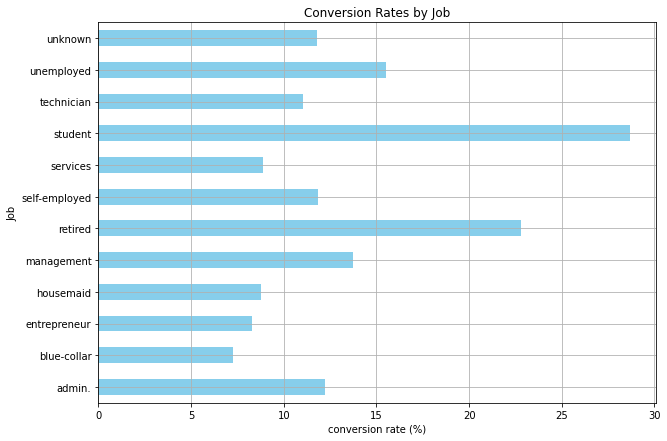

In [13]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

If you look at this code, we are using the `plot` function of the pandas DataFrame, and we define the type of this plot as a horizontal bar chart providing `barh` as input to the `kind` argument. You can simply adjust the color, size and title of the chart with the color, figure size and title arguments, respectively. You can also easily change the labels on the `x` and `y` axes, using the `set_xlabel` and `set_ylabel` functions. 

As you can see, it is much easier to detect differences in conversion rates for each category of work with a horizontal bar chart. We can easily see that the student and retiree groups are the two groups with the highest conversion rates, while the worker and employer groups are the two groups with the lowest conversion rates.

### Conversion rate by bank balances

Next, we will try to see if there are differences in the distribution of bank balances between the conversion and non-conversion groups. A boxplot is typically a good way to visualize the distribution of a variable. Let's take a look at the following code:

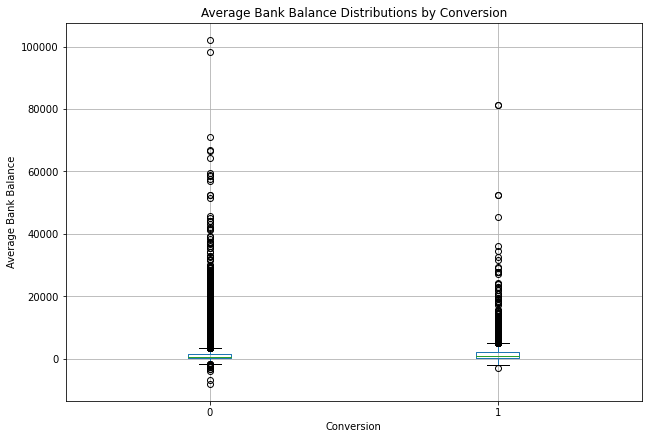

In [14]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

Due to the large number of outliers, it is quite difficult to identify any differences between the two distributions. Let's build another boxplot without outliers. The only thing you need to change from the previous code is the argument `showfliers=True` in the `boxplot` function, as you can see in the following code:

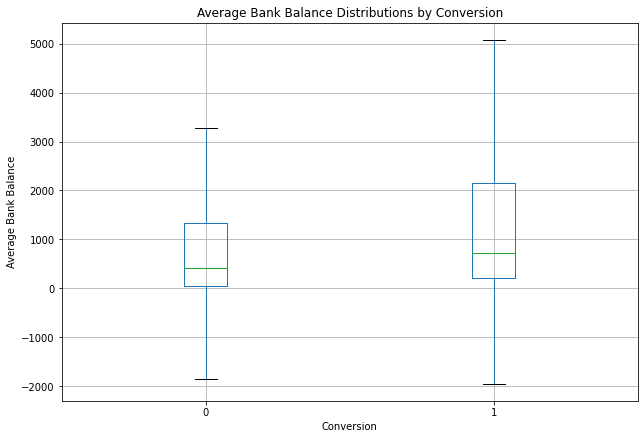

In [15]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

In these boxplot, we can see that the median bank balance is slightly higher for the conversion group, compared to the non-conversion group. In addition, the bank balances of converted customers seem to vary more than those of non-converted customers.

### Conversion rates by number of contacts

Finally, we will see how conversion rates vary according to the number of contacts. Typically, in marketing, a greater number of marketing contacts can result in marketing fatigue, where conversion rates fall as customers are reached more often. Let's see if there is any marketing fatigue in our data. Take a look at the following code:

In [16]:
conversions_by_num_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

In [17]:
conversions_by_num_contacts

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

In this code snippet, you can see that we are grouping by the campaign column (which has information about the number of contacts made during the marketing campaign for this client) and calculating the conversion rates for each number of contacts. 

As before, it would be easier to look at a graph, rather than raw numbers. We can graph this data using bar charts, with the following code:

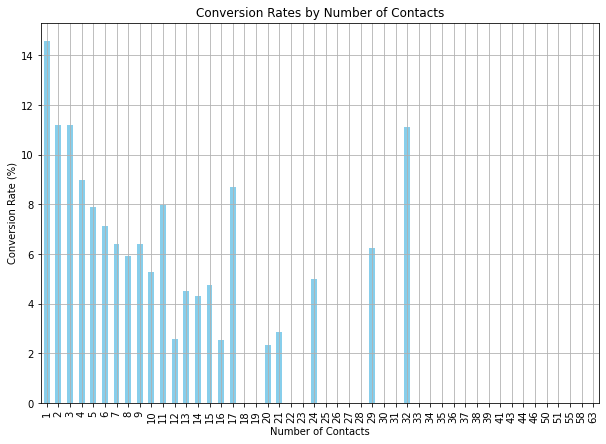

In [18]:
ax = conversions_by_num_contacts.plot(
    kind='bar',
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

There is some noise in a larger number of contacts, as the sample size is smaller for them, but you can easily see the general downward trend in this bar chart. As the number of contacts increases, the conversion rates slowly decrease. This suggests that the expected conversion rate decreases as a client is contacted more frequently for a given campaign.

## Coding of categorical variables

There are eight categorical variables in this data set: `job, marital, education, default, housing, loan, contact, and month`. Before we start building a Machine Learning model using decision trees, we need to encode these categorical variables with numerical values. We will see how we can code some of these categorical variables in this section.

### Coding of months

We all know that there can only be 12 unique values for the variable `month`. Let's take a quick look at what we have in our data set. Take a look at the following code:

In [19]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

As expected, we have 12 unique values for the month's column, from January to December. As there is a natural order in the values of the month, we can code each of the values with a corresponding number. One way to code the month's string values with numbers is shown below:

In [20]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(
    lambda x: months.index(x)+1
)

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0


In [22]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

To see how many records we have for each month, we can use the following code:

In [23]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

### Encoding of `jobs`

Next, let's see how we can encode the different categories in the job column. First we will see the unique values of this column, using the following code:

In [24]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

As you can see in this output, there is no natural order for this variable. One category of work does not precede the other, so we cannot code this variable as we did for the month. 

We will create dummy variables for each of the work categories. A dummy variable is a variable that is coded with `1` if a certain record belongs to the category, and with `0` if not. We can easily do this using the following code:

In [25]:
jobs_encoded_df = pd.get_dummies(df['job'])

In [26]:
jobs_encoded_df

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [28]:
jobs_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


As you can see in this code snippet, the `get_dummies` function in the pandas package creates a dummy variable for each category of the `job` variable, and codes each record with `1` if the given record belongs to the corresponding category, and `0` if not. Then, we rename the columns by prefixing each column with `job_`. 

As you can see, the first record (or client) belongs to the admin working category, while the second record belongs to the blue-collar working category. Now that we have created dummy variables for each working category, we need to add this data to the existing DataFrame. Take a look at the following code:

In [29]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


Using the `concat` function in the pandas package, you can easily add the newly created DataFrame with dummy variables, `jobs_encoded_df`, to the original DataFrame, `df`. The argument `axis=1` tells the `concat` function ***to concatenate the second DataFrame with the first one as columns, not as rows***. 

As you can see, the newly created dummy variables are added to the original DataFrame as new columns for each record.

### Encoding of `marital`

Similar to how we code the categorical variable, `job` we will create dummy variables for each category of the marital variable. As before, we are using the following code to code the marital column:

In [30]:
marital_encoded_df = pd.get_dummies(df['marital'])

In [31]:
marital_encoded_df

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [32]:
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [33]:
marital_encoded_df

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [34]:
df = pd.concat([df, marital_encoded_df], axis=1)

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


Once you've gotten this far, your original DataFrame, `df`, should contain all the original columns, plus the newly created dummy variables for the job and marital columns.

### Encoding the housing and loan variables

The last two categorical variables that we will encode in this section are the `housing` and the `loan`. The `housing` variable has two unique values, "yes" and "no", and contains information about whether a client has a home loan. The other variable, `loan`, also has two unique values, "yes" and "no," and tells us if a client has a personal loan. We can easily code these two variables using the following code:

In [36]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

In [37]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


In [38]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,...,0,0,0,0,0,0,1,0,0,1


## Building Decision Trees

Now let's start building a decision tree. This is the part where we create "Artificial Intelligence", specifically applying this Machine Learning algorithm. 

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning

Among decision support tools, decision trees have several advantages. Decision trees:
* Are simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
* Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.
* Help determine worst, best and expected values for different scenarios.
* Use a white box model. If a given result is provided by a model.
* Can be combined with other decision techniques.


### Feature selection

Now that we have encoded all the categorical variables, we can finally start building decision tree models. We will use the following variables as features in our decision tree models:

In [40]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
    'job_admin.',
    'job_blue-collar',
    'job_entrepreneur',
    'job_housemaid',
    'job_management',
    'job_retired',
    'job_self-employed',
    'job_services',
    'job_student',
    'job_technician',
    'job_unemployed',
    'job_unknown',
    'marital_divorced',
    'marital_married',
    'marital_single'
]

To build and train a decision tree model with Python, we will use the `tree` module in the scikit-learn package. You can import the required module using the following line of code:

In [41]:
from sklearn import tree

Under the tree module in the sklearn package, there is a class called `DecisionTreeClassifier`, which we can use to train a decision tree model. Take a look at the following code:

In [42]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

There are many arguments for the `DecisionTreeClassifier` class, apart from the one we are using here, `max_depth`. The `max_depth` argument controls how much a tree can grow, and here, we limit it to `4`, which means that the maximum length from root to leaf can be `4`. 

You can also use the `criterion` argument to choose between Gini impurity and entropy information gain measurements for the quality of a split. 

There are many other ways to fit your decision tree model, and we recommend that you take a look at the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" />documentation here</a> for more information.

To train this decision tree model, you can use the following code:

In [43]:
dt_model.fit(df[features], df['conversion'])

DecisionTreeClassifier(max_depth=4)

## Interpretation of decision trees

Now that we have trained a decision tree model, we need to extract the knowledge from the model. In this section, we're going to use a package called `graphviz`. You can install this package using the following command in your terminal:

In [44]:
!pip3 install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
You should consider upgrading via the '/home/daniel/Desktop/narrativetext_project/notebooks/bin/python -m pip install --upgrade pip' command.


In [45]:
import graphviz

Now that we have configured our environment with the new package, graphviz, let's take a look at the following code to see how we can visualize the trained decision tree:

In [46]:
dot_data = tree.export_graphviz(
    dt_model, 
    feature_names=features, 
    class_names=['0', '1'], 
    filled=True, 
    rounded=True, 
    special_characters=True
) 

graph = graphviz.Source(dot_data)

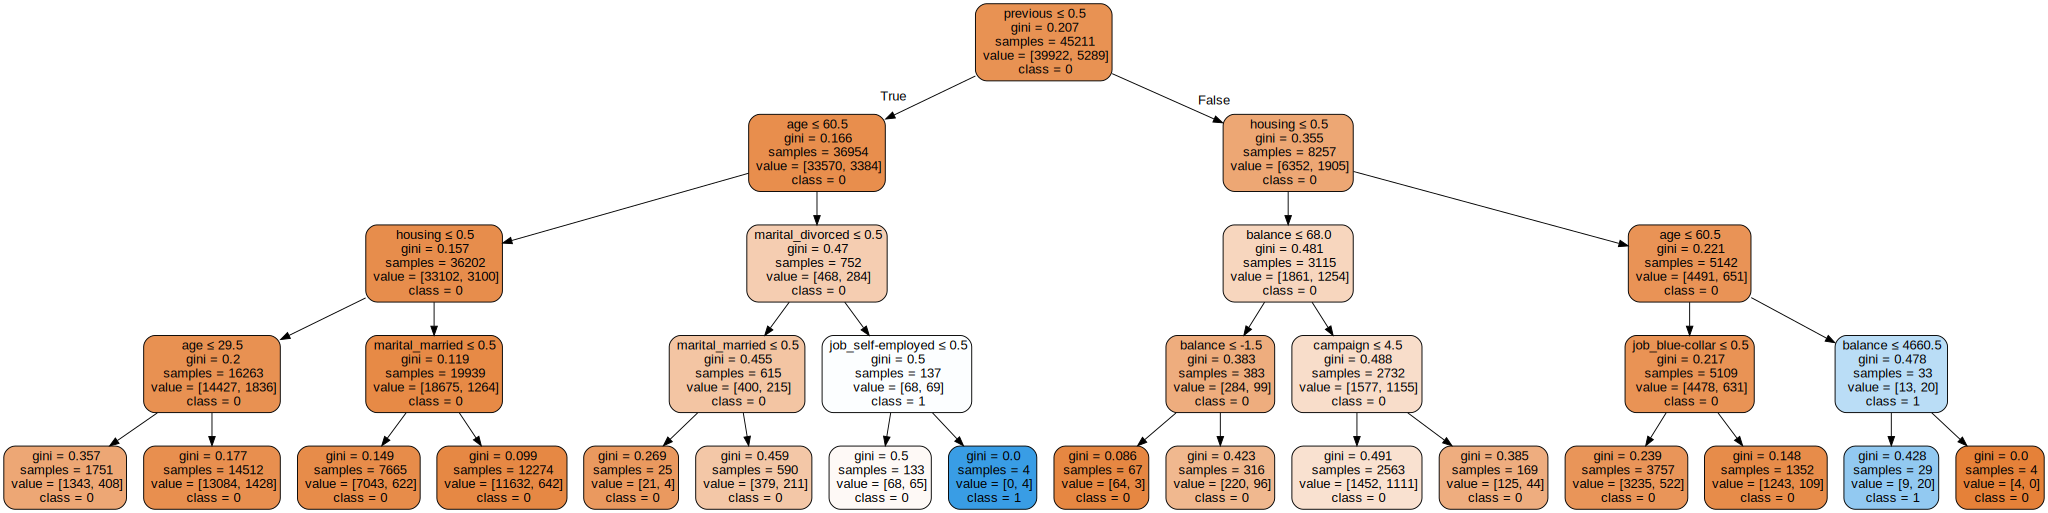

In [47]:
graph

As you can see, we first export the trained decision tree model, `dt_model`, using the `export_graphviz` function in the tree module of the sklearn package. 

We can define the feature variables we use to train this model using the `feature_names` argument. Next, we can define the classes (conversion versus non-conversion) that this model is trained to classify. 

The `export_graphviz` function exports the trained decision tree model in a DOT format, which is a graphical description language. You can then pass `dot_data` to the `graphviz` class `Source`. The `graphviz` variable now contains a renderable graphic.

Let's take a closer look at this diagram. Each node contains five lines describing the information that the given node has. The top line tells us the criteria for division. The root node, for example, is divided into its child nodes based on the value of the variable above. If the value of this previous variable is less than or equal to `0.5`, then it goes to the left child. On the other hand, if the value of this previous variable is greater than `0.5`, then it goes to the right child. 

The second line tells us the value of the quality measure for the division. Here, we select the gini impurity measure for the criterion, so we can see the changes in the impurity measures at each node in the second line. The third line tells us the total number of records that belong to the given node. For example, there are '45,211' samples at the root node, and there are '8,257' samples at the right child of the root node.

The fourth line of each node tells us the composition of the records in two different classes. The first element represents the number of records in the non-conversion group, and the second element represents the number of records in the conversion group. 

For example, in the root node, there are `39,922` records in the non-conversion group and `5,289` records in the conversion group. Finally, the fifth line of each node tells us what will be the prediction or classification of the node in question. For example, if a sample belongs to the leftmost leaf, the classification of this decision tree model will be `0`, which means that there will be no conversion. On the other hand, if a sample belongs to the eighth leaf from the left, the classification of this decision tree model will be `1`, which means conversion.

### Digging deeper

Now that we know what each line of each node means, let's discuss how we can get information from this tree graph. To understand the clients that belong to each node in the leaf, we have to go through the tree. 

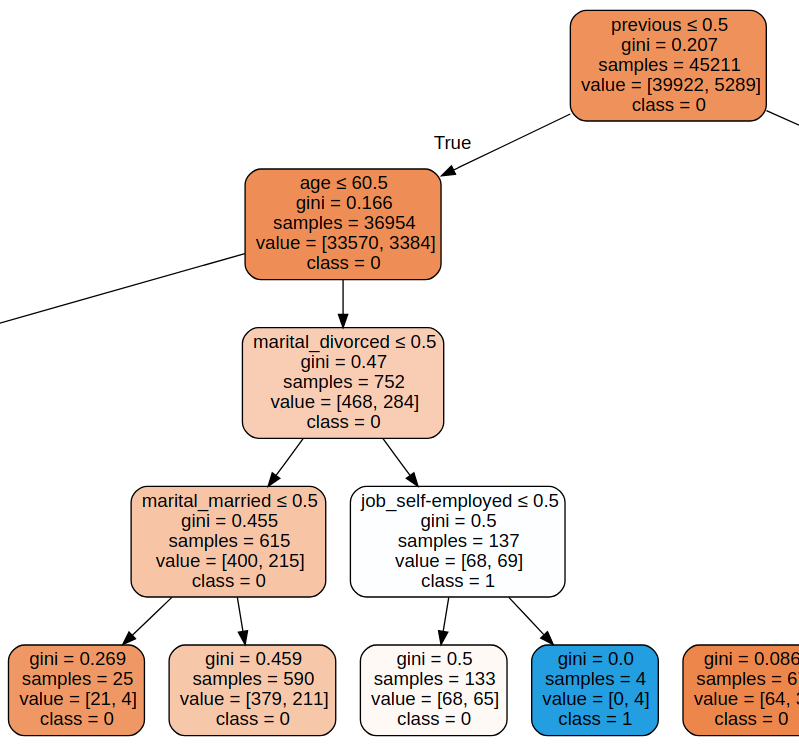

For example, ***look at the blue box*** at the bottom of this picture. ***If you see the class of this box, it is equal to 1***. Clients that belong to this box (or leaf) node are those with a value of `0` for the first variable (called here as previous), an age greater than `60.5`, a `marital_divorced` variable with a value of the class equal to `1`, and a `job_self-employed` class variable with a value of `1`. In other words, those who were not contacted before this campaign and who are older than `60.5`, divorced and self-employed belong to this node, and have a high probability of conversion.

Let's repeat it. Pospects of this company who match with the following attributes have a high probability of becoming subscribers.
* not contacted before by the company
* an age greater than 60.5
* divorced
* self-employed

***With this we have a very complete picture of the customer profile and who we should be targeting with our marketing efforts! And we started to become a data-driven company***.

### Second node with class equal to 1

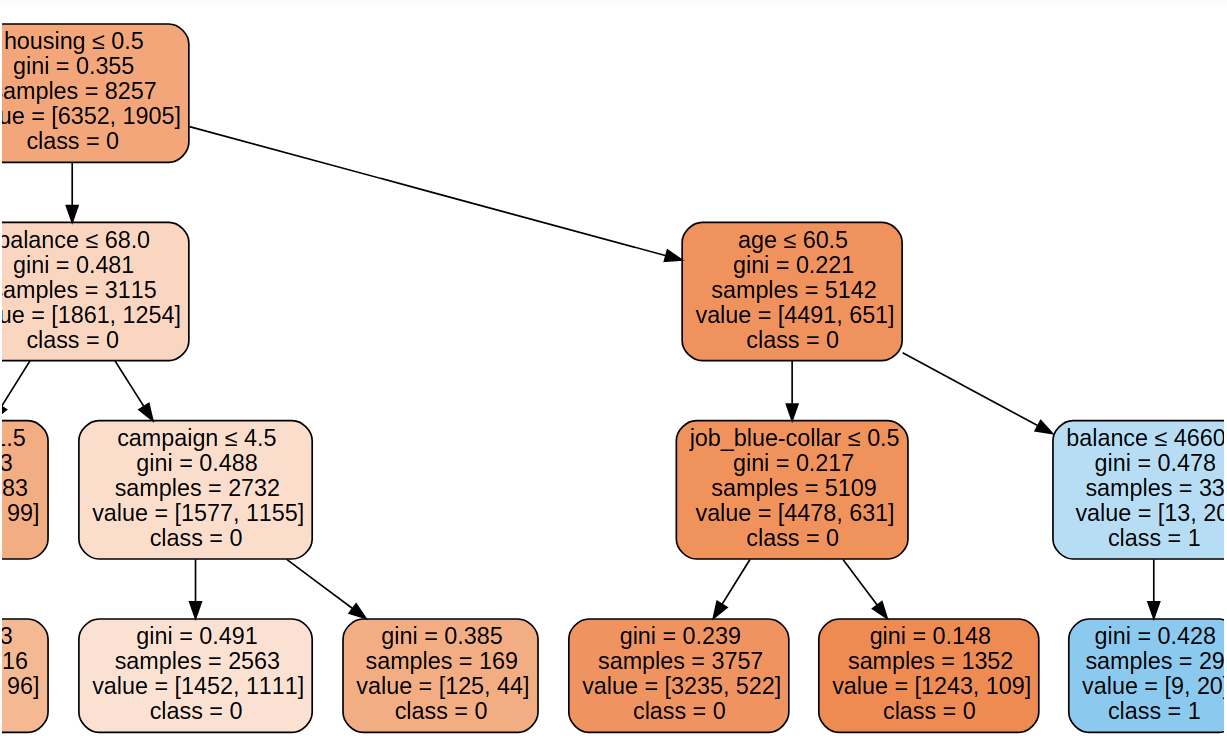



Let's look at another example. The clients who belong to the second node on the right-hand sheet (again, who has a blue box and a class equal to 1) are those who have a value of `1` for the previous variable, a value of `1` for the housing variable, an age greater than `60.5`, and a balance less than or equal to `4660.5`. That is, those clients who were contacted before this campaign and who have a home loan, are older than `60.5`, and have a bank balance of less than 4,660.5 belong to this node and 20 of the 29 belonging to this node have been converted and subscribed to a time deposit.

Let's repeat it. Pospects of this company who match with the following attributes (ALSO) have a high probability of becoming subscribers.

* were contacted before by the company
* have a home loan
* an age greater than 60.5
* have a bank balance of less than 4,660.5

## Conclusion

**As you will have noticed in these two examples, you can obtain very useful knowledge about who are more or less prone to convert from trained decision tree models, visualizing the trained tree. Just follow the nodes and understand which types of attributes are highly correlated with your target class**. For this exercise, we restrict the tree to grow only to a depth of 4, but we can choose to grow a larger or smaller tree than the one we use in this exercise.